# Preprocess Kaggle competition Dataset
We preprocess data for training.
We have got the next columns:
- id: unique id for a news article
- title: the title of a news article
- author: author of the news article
- text: the text of the article; could be incomplete
- label: a label that marks the article as potentially unreliable
   -  1: unreliable
   -  0: reliable

## Importing packages 

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict, Counter
import string
from sklearn.feature_extraction.text import CountVectorizer

import os.path as op
%matplotlib inline

In [2]:
DATA_DIR = '../../Data'

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Training Data :

In [3]:
# Load train data
train = pd.read_csv(op.join(DATA_DIR, 'Kaggle_competition/Unprocessed_data/train.csv'))
train

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1      Ever get the feeling your life circles the rou...      0  
2      Why the Truth Might Get You Fired October 29, ...      1  
3      Videos 15 Civilians Killed In Single US Airstr...      1  
4      Print \nAn Iranian woman has been sentenced to...      1  
...                                                  ...    ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macy’s of today grew from the union of sev...      0  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  
20799    David Swanson is an author, activist, journa...      1  

[20800 rows x 5 columns]

## Deal with the null values 

In [4]:
# Find Na 
train.isnull().sum()

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id           0
title      558
author    1957
text        39
label        0
dtype: int64

- We are going to replace the null values in the column text by the values of the column title 

In [5]:
# replace na in text
for n in range (0,len(train)):
    if pd.isnull(train['text'][n]):
        train['text'][n]= str(train['text'][n]).replace('nan', train['title'][n])
train.isnull().sum()

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


id           0
title      558
author    1957
text         0
label        0
dtype: int64

- We are going to replace the null values in the column title by the values of the column text 

In [6]:
# replace na in title
for n in range (0,len(train)):
    if pd.isnull(train['title'][n]):
        train['title'][n]= str(train['title'][n]).replace('nan', train['text'][n])
train.isnull().sum()

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


id           0
title        0
author    1957
text         0
label        0
dtype: int64

In [7]:
# Find Na 
train.isnull().sum()

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id           0
title        0
author    1957
text         0
label        0
dtype: int64

## Dealing with duplicate values 

In [8]:
train.drop_duplicates().shape, train.shape

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((20800, 5), (20800, 5))

## Saving the results in files 

In [9]:
train.to_csv(op.join(DATA_DIR, 'Kaggle_competition/Claims_to_work_with/claims.csv'), index=False)

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data profiling 

In [10]:
from pandas_profiling import ProfileReport

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
profile = ProfileReport(train, title="Pandas Profiling Report", explorative=True)

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
profile 

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
profile.to_file(op.join(DATA_DIR,"Kaggle_competition/Claims_to_work_with/Kaggle_report.html"))

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Some stats 

In [14]:
stat=train.author.value_counts()

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
stat

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pam Key                                                                                                   243
admin                                                                                                     193
Jerome Hudson                                                                                             166
Charlie Spiering                                                                                          141
John Hayward                                                                                              140
                                                                                                         ... 
Miss Marple                                                                                                 1
Scientists Find A Plant That Could Treat Diabetes &amp; Kill Cancer Cells – Collective Evolution | SFO      1
Lela Moore and Michelle Baruchman                                                                           1
Michael D.

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


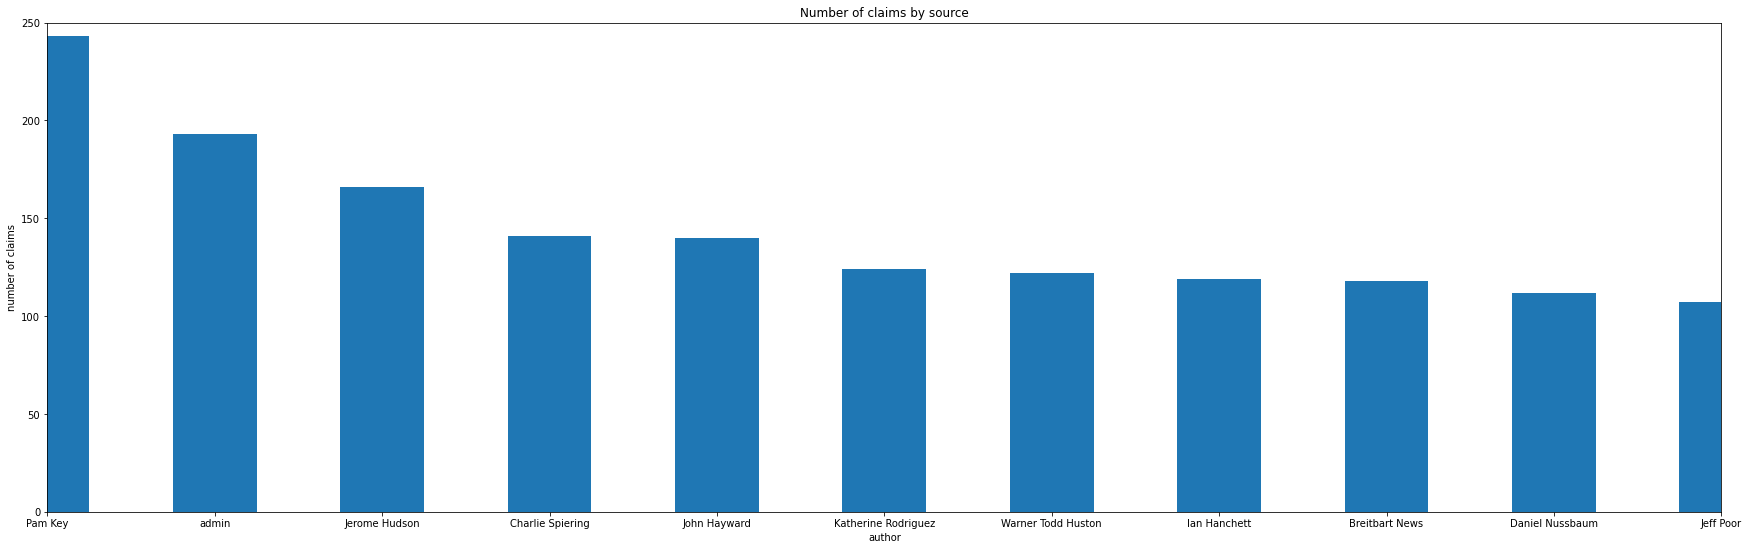

In [16]:
# Define plot space
fig, ax = plt.subplots(figsize=(30, 9))
# Define x and y axes
ax.bar(stat.index, stat.values, align='center', width=0.50)
# Set plot title and axes labels
ax.set(title = "Number of claims by source")
ax.set_xlabel("author")
ax.set_ylabel("number of claims")
ax.set_xlim(0, 10)
ax.set_ylim(0, 250)
plt.show()